In [1]:
import numpy as np
from numpy import genfromtxt
data = genfromtxt('data.csv', delimiter=',')


# Just a bit of preprocessing
i = 0
for row in data:
    row[0] = 0
    i = i+1

#If I were to seperate the testing and training data myself, this is how I would do it

#testing = data[1:157]  #Assigning 80% of data to testing
#training = data[158:]  #Assigning 20% of data to training

    

In [13]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score



knn = KNeighborsClassifier()

data = data[1:]

#splitting between features and labels
x = data[:,:-1]
y = data[:,-1]


# this is me just trying some sample code out, just so I know what I'm doing
scores = cross_val_score(knn, x, y, cv=10)

print(np.mean(scores))

0.770789473684


In [3]:
from sklearn.grid_search import GridSearchCV


# Ran a simple GridSearchCV algorithm using 10 k fold
nRange = [4,5,6,7,8,9,10]
param_grid = dict(n_neighbors = nRange)


# Running gridsearch with 10 k-folds
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(x,y)


grid.grid_scores_

[mean: 0.71795, std: 0.15778, params: {'n_neighbors': 4},
 mean: 0.76410, std: 0.15210, params: {'n_neighbors': 5},
 mean: 0.74359, std: 0.17038, params: {'n_neighbors': 6},
 mean: 0.76410, std: 0.11987, params: {'n_neighbors': 7},
 mean: 0.74872, std: 0.12471, params: {'n_neighbors': 8},
 mean: 0.76923, std: 0.11058, params: {'n_neighbors': 9},
 mean: 0.76410, std: 0.11015, params: {'n_neighbors': 10}]

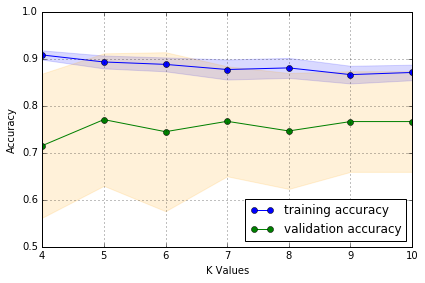

In [18]:
#Validation Curve

#I used the code in the notebook as my guideline

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.learning_curve import validation_curve


train_scores, test_scores = validation_curve(knn, x, y, param_name = 'n_neighbors',param_range=nRange,cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(nRange, train_mean, 
         color='blue', marker='o', 
          label='training accuracy')

plt.fill_between(nRange, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(nRange, test_mean, 
         color='orange', marker='o',
         label='validation accuracy')

plt.fill_between(nRange, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='orange')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

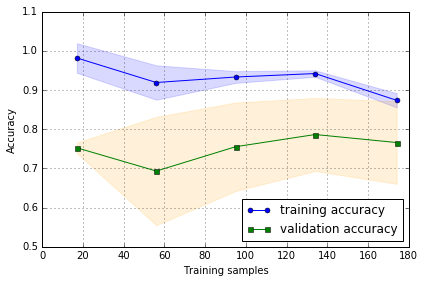

In [19]:
#This is an example of the learning curve

#Also used the code in the python notebook as a guideline

from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn, x, y, cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,  color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,  alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='orange', linestyle='-', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='orange')

plt.grid()
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.1])
plt.tight_layout()
plt.show()

# Note: I used the code in the example Notebooks to help me construct the graphs

## In addition, I don't think my computer supports parallel processing, therefore I opted out of the 'n-jobs' parameter